In [ ]:
!rm -r /content/*.py

In [ ]:
queries = []

filenames_1 = [
             "Approach_10.py",
             "train_sequence_approach_10.py",
             "base_learner_10.py",
             "helper_functions_10.py",
]



filenames_2 = [
               "Algorithmic_Search_10.py",
               "Prediction_Pipeline_10.py"
]

filenames_3 = [
              "Similar_Word_Scraper.py",
              "Embed_Generator.py"
]

for fn in filenames_1:
  queries.append(f"https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/Part_A/{fn}")

for fn in filenames_2:
  queries.append(f"https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/Algorithmic_Approach/{fn}")

for fn in filenames_3:
  queries.append(f"https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/word_generation/{fn}")


In [ ]:
queries

['https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/Part_A/Approach_10.py',
 'https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/Part_A/train_sequence_approach_10.py',
 'https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/Part_A/base_learner_10.py',
 'https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/Part_A/helper_functions_10.py',
 'https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/Algorithmic_Approach/Algorithmic_Search_10.py',
 'https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/Algorithmic_Approach/Prediction_Pipeline_10.py',
 'https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/word_generation/Similar_Word_Scraper.py',
 'https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/word_generation/Embed_Generator.py']

In [ ]:
import subprocess
# Download and import my module files from GitHub
result = subprocess.run(["wget", "--no-cache", "--backups=1"] + queries, stderr=subprocess.PIPE, stdout=subprocess.PIPE)
print(result.stderr.decode("utf-8"))

--2022-05-07 06:14:43--  https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/Part_A/Approach_10.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4208 (4.1K) [text/plain]
Failed to rename Approach_10.py to Approach_10.py.1: (2) No such file or directory
Saving to: ‘Approach_10.py’

     0K ....                                                  100% 27.8M=0s

2022-05-07 06:14:43 (27.8 MB/s) - ‘Approach_10.py’ saved [4208/4208]

--2022-05-07 06:14:43--  https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/Part_A/train_sequence_approach_10.py
Reusing existing connection to raw.githubusercontent.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 6503 (6.4K) [text/plain]
Failed to rename train_sequence_approach_10.p

In [ ]:
!wget --no-cache --backups=1 https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/housing_params.json

--2022-05-07 06:14:44--  https://raw.githubusercontent.com/NuoWenLei/senior_project_stuff/main/housing_params.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 900 [text/plain]
Failed to rename housing_params.json to housing_params.json.1: (2) No such file or directory
Saving to: ‘housing_params.json’

housing_params.json 100%[===================>]     900  --.-KB/s    in 0s      

2022-05-07 06:14:44 (34.2 MB/s) - ‘housing_params.json’ saved [900/900]



In [ ]:
import json

with open("housing_params.json", "r") as housing_params_json:
  params = json.load(housing_params_json)

params["META_EPOCHS"] = 3

with open("housing_params.json", "w") as housing_params_json_write:
  json.dump(params, housing_params_json_write)

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import json

with open("housing_params.json", "r") as salary_params_json:
  params = json.load(salary_params_json)

In [ ]:
params

In [ ]:
from Embed_Generator import *
from Similar_Word_Scraper import *

In [ ]:
import pandas as pd

data = pd.read_csv(params["DATA_PATH"])

In [ ]:
data.head()

In [ ]:
feature_words = []

for i in data.columns:
  feature_words.extend(i.lower().split(" "))

In [ ]:
feature_words_set = list(set(feature_words))

In [ ]:
feature_words_set

In [ ]:
Similar_Word_Scraper.initialize_nltk()

In [ ]:
word_scraper = Similar_Word_Scraper(feature_words_set, params["VOCAB_DEPTH"])


In [ ]:
word_set = word_scraper()

In [ ]:
with open(params["VOCAB_PATH"], "w") as vocab_json:
  json.dump(word_set, vocab_json)

In [ ]:
!python3 -m spacy download en_core_web_md

## Restart Runtime here

In [ ]:
import json
with open("housing_params.json", "r") as params_json:
  params = json.load(params_json)

In [ ]:
with open(params["VOCAB_PATH"], "r") as vocab_json:
  vocab = json.load(vocab_json)

In [ ]:
with open(params["VOCAB_PATH"], "w") as vocab_json_write:
  json.dump([i[0] for i in vocab], vocab_json_write)

In [ ]:
from Embed_Generator import *


In [ ]:
embed_generator = Embed_Generator([i[0] for i in vocab])

In [ ]:
np_embeds = embed_generator()

In [ ]:
np_embeds.shape

(8929, 300)

In [ ]:
import numpy as np
with open(params["EMBED_PATH"], "wb") as f:
  np.save(f, np_embeds)

# Train Sequence

In [ ]:
from train_sequence_approach_10 import *

In [ ]:
part_a_interpreter, algo, logs = train_sequence("housing_params.json", dataset_name = "salary")

On Epoch 0
Epoch 0, Step 0: 0.286, Guess Most Similar Words: ['observed' 'concentration' 'blood' 'levels' 'substance'], Target Most Similar Words: ['people' 'less' 'one' 'amount' 'of'], Target Word: per capita crime rate by town
Cosine Similarity between most similar word/target embedding: [0.37467018 0.35832816 0.3679385  0.45953    0.34006014], diff between max guess and max target: 0.12734663486480713


Epoch 0, Step 1: 0.340, Guess Most Similar Words: ['concentration' 'density' 'elevated' 'surface' 'porous'], Target Most Similar Words: ['less' 'one' 'amount' 'people' 'of'], Target Word: proportion of non retail business acres per town
Cosine Similarity between most similar word/target embedding: [0.36061642 0.39033747 0.34545615 0.34524208 0.34524208], diff between max guess and max target: 0.22571569681167603


Epoch 0, Step 2: 0.475, Guess Most Similar Words: ['amount' 'of' 'less' 'people' 'one'], Target Most Similar Words: ['strength' 'substance' 'accordance' 'firmness' 'probabl

## Visualize Results

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(logs)

In [ ]:
df.head()

,learner_mae,meta_mae,learner_weight_magnitude,learner_bias_magnitude,guess_cos_sim,max_sim_diff
0,0.330435,"tf.Tensor(0.28629583, shape=(), dtype=float32)",0.340511,[0.010172559],"(tf.Tensor(0.37467018, shape=(), dtype=float32...",0.127347
1,0.295647,"tf.Tensor(0.34045574, shape=(), dtype=float32)",0.259097,[0.0021501717],"(tf.Tensor(0.36061642, shape=(), dtype=float32...",0.225716
2,0.486956,"tf.Tensor(0.4747798, shape=(), dtype=float32)",0.484159,[0.012132225],"(tf.Tensor(0.4940431, shape=(), dtype=float32)...",0.065877
3,0.562832,"tf.Tensor(0.42458495, shape=(), dtype=float32)",0.283646,[0.013852698],"(tf.Tensor(0.37486303, shape=(), dtype=float32...",0.108002
4,0.876140,"tf.Tensor(0.29707217, shape=(), dtype=float32)",0.290969,[0.015177388],"(tf.Tensor(0.40383637, shape=(), dtype=float32...",0.159892


In [ ]:
df["meta_mae_numpy"] = [a.numpy() for a in df["meta_mae"]]
df.drop("meta_mae", axis = 1, inplace = True)
df["learner_bias_magnitude_1"] = [a[0] for a in df["learner_bias_magnitude"]]
df["step"] = df.index
df["guess_cos_sim_np"] = [a.numpy() for a in df["guess_cos_sim"]]
df["guess_cos_sim_max"] = [max(a) for a in df["guess_cos_sim_np"]]
for i in range(df["guess_cos_sim_np"].iloc[0].shape[0]):
  df[f"guess_cos_sim_{i}"] = [a[i] for a in df["guess_cos_sim_np"]]
  
df.head()

,learner_mae,learner_weight_magnitude,learner_bias_magnitude,guess_cos_sim,max_sim_diff,meta_mae_numpy,learner_bias_magnitude_1,step,guess_cos_sim_np,guess_cos_sim_max,guess_cos_sim_0,guess_cos_sim_1,guess_cos_sim_2,guess_cos_sim_3,guess_cos_sim_4
0,0.330435,0.340511,[0.010172559],"(tf.Tensor(0.37467018, shape=(), dtype=float32...",0.127347,0.286296,0.010173,0,"[0.37467018, 0.35832816, 0.3679385, 0.45953, 0...",0.459530,0.374670,0.358328,0.367938,0.459530,0.340060
1,0.295647,0.259097,[0.0021501717],"(tf.Tensor(0.36061642, shape=(), dtype=float32...",0.225716,0.340456,0.002150,1,"[0.36061642, 0.39033747, 0.34545615, 0.3452420...",0.390337,0.360616,0.390337,0.345456,0.345242,0.345242
2,0.486956,0.484159,[0.012132225],"(tf.Tensor(0.4940431, shape=(), dtype=float32)...",0.065877,0.474780,0.012132,2,"[0.4940431, 0.3115543, 0.40942967, 0.23912275,...",0.494043,0.494043,0.311554,0.409430,0.239123,0.288181
3,0.562832,0.283646,[0.013852698],"(tf.Tensor(0.37486303, shape=(), dtype=float32...",0.108002,0.424585,0.013853,3,"[0.37486303, 0.3109573, 0.29233053, 0.35162488...",0.374863,0.374863,0.310957,0.292331,0.351625,0.310957
4,0.876140,0.290969,[0.015177388],"(tf.Tensor(0.40383637, shape=(), dtype=float32...",0.159892,0.297072,0.015177,4,"[0.40383637, 0.4123765, 0.47350076, 0.45110488...",0.473501,0.403836,0.412376,0.473501,0.451105,0.440131


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

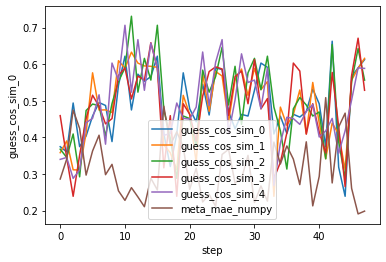

In [ ]:
# sns.lineplot(data = df, x = "step", y = "learner_mae", label = "learner_mae")
for i in range(df["guess_cos_sim_np"].iloc[0].shape[0]):
  sns.lineplot(data = df, x = "step", y = f"guess_cos_sim_{i}", label = f"guess_cos_sim_{i}")
sns.lineplot(data = df, x = "step", y = "meta_mae_numpy", label = "meta_mae_numpy")
plt.legend()
# plt.ylim(0,.75)

In [ ]:
df["learner_bias_magnitude_2"] = np.abs(df["learner_bias_magnitude_1"])
df["guess_cos_sim_sum"] = [sum(a) for a in df["guess_cos_sim_np"]]

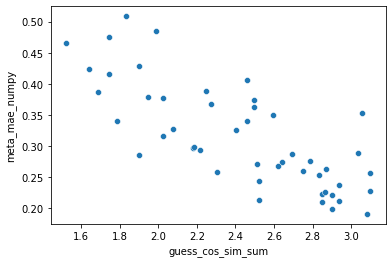

In [ ]:
sns.scatterplot(data = df, x = "guess_cos_sim_sum", y = "meta_mae_numpy")

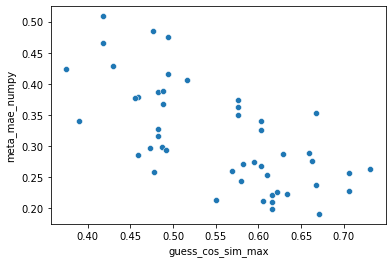

In [ ]:
sns.scatterplot(data = df, x = "guess_cos_sim_max", y = "meta_mae_numpy")


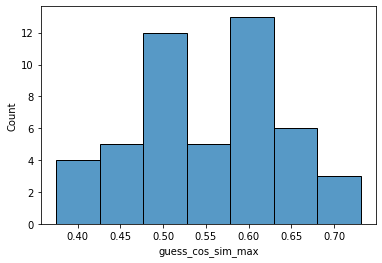

In [ ]:
sns.histplot(data = df, x = "guess_cos_sim_max")

## Test Interpreter

In [ ]:
from Prediction_Pipeline_10 import *

In [ ]:
full_results_dict = {}
number_of_neurons_in_base_model = 16

In [ ]:
import numpy as np
import json
from train_sequence_approach_10 import tf
from helper_functions_10 import *
with open("housing_params.json", "r") as params_json:
  params = json.load(params_json)

vocab, embed_mat, vocab_to_number = load_embed_and_dictionary(params["VOCAB_PATH"], params["EMBED_PATH"])

dataset_generator = load_dataset_generator(params["DATA_PATH"], dataset_name = "salary")

metrics = {"MeanAbsoluteError": tf.keras.metrics.MeanAbsoluteError()}

for train_test_batch in dataset_generator:

  batch = train_test_batch
  X_train, X_test, y_train, y_test = train_test_batch
  if y_train.name in full_results_dict.keys():
    break
  print(y_train.name)
  base_model = tf.keras.models.Sequential([
                                         tf.keras.layers.Dense(number_of_neurons_in_base_model, activation = "relu"),
                                         tf.keras.layers.Dense(1, activation = "linear")
  ])

  base_model.compile(
      loss = "mse",
      optimizer = "adam",
      metrics = ["mae"]
  )
  feature_embeds = np.array([average_embed(w, embed_mat, vocab_to_number) for w in batch[0].columns]).reshape(1, batch[0].shape[1], -1)
  interp_callback_training = Train_Pipeline(base_model, part_a_interpreter, algo, -1, feature_embeds, number_of_neurons_in_base_model, tf.keras.losses.MeanSquaredError(), tf.keras.optimizers.Adam())
  interp_callback_training.fit(X_train, y_train, 64, 1)
  final_preds = []
  for i in interp_callback_training.interpreter_callback.interpreter_output_words:
    final_preds.append(i[-1])
  full_results_dict[y_train.name] = final_preds

per capita crime rate by town
On Epoch 0


100%|██████████| 6/6 [00:00<00:00, 69.14it/s]


On Epoch 1


100%|██████████| 6/6 [00:00<00:00, 101.64it/s]


On Epoch 2


100%|██████████| 6/6 [00:00<00:00, 115.75it/s]


On Epoch 3


100%|██████████| 6/6 [00:00<00:00, 126.39it/s]


On Epoch 4


100%|██████████| 6/6 [00:00<00:00, 131.51it/s]


On Epoch 5


100%|██████████| 6/6 [00:00<00:00, 127.45it/s]


On Epoch 6


100%|██████████| 6/6 [00:00<00:00, 113.71it/s]


On Epoch 7


100%|██████████| 6/6 [00:00<00:00, 132.03it/s]


On Epoch 8


100%|██████████| 6/6 [00:00<00:00, 126.71it/s]


On Epoch 9


100%|██████████| 6/6 [00:00<00:00, 120.33it/s]


proportion of non retail business acres per town
On Epoch 0


100%|██████████| 6/6 [00:00<00:00, 88.17it/s]


On Epoch 1


100%|██████████| 6/6 [00:00<00:00, 134.22it/s]


On Epoch 2


100%|██████████| 6/6 [00:00<00:00, 131.10it/s]


On Epoch 3


100%|██████████| 6/6 [00:00<00:00, 29.12it/s]


On Epoch 4


100%|██████████| 6/6 [00:00<00:00, 127.05it/s]


On Epoch 5


100%|██████████| 6/6 [00:00<00:00, 124.12it/s]


On Epoch 6


100%|██████████| 6/6 [00:00<00:00, 129.63it/s]


On Epoch 7


100%|██████████| 6/6 [00:00<00:00, 113.64it/s]


On Epoch 8


100%|██████████| 6/6 [00:00<00:00, 117.67it/s]


On Epoch 9


100%|██████████| 6/6 [00:00<00:00, 118.46it/s]


nitric oxides concentration
On Epoch 0


100%|██████████| 6/6 [00:00<00:00, 83.15it/s]


On Epoch 1


100%|██████████| 6/6 [00:00<00:00, 115.04it/s]


On Epoch 2


100%|██████████| 6/6 [00:00<00:00, 117.12it/s]


On Epoch 3


100%|██████████| 6/6 [00:00<00:00, 132.24it/s]


On Epoch 4


100%|██████████| 6/6 [00:00<00:00, 127.60it/s]


On Epoch 5


100%|██████████| 6/6 [00:00<00:00, 112.86it/s]


On Epoch 6


100%|██████████| 6/6 [00:00<00:00, 107.05it/s]


On Epoch 7


100%|██████████| 6/6 [00:00<00:00, 127.62it/s]


On Epoch 8


100%|██████████| 6/6 [00:00<00:00, 112.93it/s]


On Epoch 9


100%|██████████| 6/6 [00:00<00:00, 127.59it/s]


rooms per dwelling
On Epoch 0


100%|██████████| 6/6 [00:00<00:00, 78.21it/s]


On Epoch 1


100%|██████████| 6/6 [00:00<00:00, 130.32it/s]


On Epoch 2


100%|██████████| 6/6 [00:00<00:00, 135.04it/s]


On Epoch 3


100%|██████████| 6/6 [00:00<00:00, 119.89it/s]


On Epoch 4


100%|██████████| 6/6 [00:00<00:00, 123.80it/s]


On Epoch 5


100%|██████████| 6/6 [00:00<00:00, 116.96it/s]


On Epoch 6


100%|██████████| 6/6 [00:00<00:00, 128.71it/s]


On Epoch 7


100%|██████████| 6/6 [00:00<00:00, 106.75it/s]


On Epoch 8


100%|██████████| 6/6 [00:00<00:00, 120.38it/s]


On Epoch 9


100%|██████████| 6/6 [00:00<00:00, 129.89it/s]


proportion of owner occupied units built
On Epoch 0


100%|██████████| 6/6 [00:00<00:00, 81.39it/s]


On Epoch 1


100%|██████████| 6/6 [00:00<00:00, 117.82it/s]


On Epoch 2


100%|██████████| 6/6 [00:00<00:00, 135.57it/s]


On Epoch 3


100%|██████████| 6/6 [00:00<00:00, 127.78it/s]


On Epoch 4


100%|██████████| 6/6 [00:00<00:00, 124.43it/s]


On Epoch 5


100%|██████████| 6/6 [00:00<00:00, 126.35it/s]


On Epoch 6


100%|██████████| 6/6 [00:00<00:00, 117.14it/s]


On Epoch 7


100%|██████████| 6/6 [00:00<00:00, 114.32it/s]


On Epoch 8


100%|██████████| 6/6 [00:00<00:00, 123.55it/s]


On Epoch 9


100%|██████████| 6/6 [00:00<00:00, 110.16it/s]


distances to five boston employment centres
On Epoch 0


100%|██████████| 6/6 [00:00<00:00, 69.69it/s]


On Epoch 1


100%|██████████| 6/6 [00:00<00:00, 101.16it/s]


On Epoch 2


100%|██████████| 6/6 [00:00<00:00, 120.88it/s]


On Epoch 3


100%|██████████| 6/6 [00:00<00:00, 120.64it/s]


On Epoch 4


100%|██████████| 6/6 [00:00<00:00, 114.55it/s]


On Epoch 5


100%|██████████| 6/6 [00:00<00:00, 126.40it/s]


On Epoch 6


100%|██████████| 6/6 [00:00<00:00, 131.93it/s]


On Epoch 7


100%|██████████| 6/6 [00:00<00:00, 102.57it/s]


On Epoch 8


100%|██████████| 6/6 [00:00<00:00, 130.72it/s]


On Epoch 9


100%|██████████| 6/6 [00:00<00:00, 126.10it/s]


accessibility to radial highways
On Epoch 0


100%|██████████| 6/6 [00:00<00:00, 78.05it/s]


On Epoch 1


100%|██████████| 6/6 [00:00<00:00, 116.25it/s]


On Epoch 2


100%|██████████| 6/6 [00:00<00:00, 104.31it/s]


On Epoch 3


100%|██████████| 6/6 [00:00<00:00, 128.63it/s]


On Epoch 4


100%|██████████| 6/6 [00:00<00:00, 115.98it/s]


On Epoch 5


100%|██████████| 6/6 [00:00<00:00, 111.95it/s]


On Epoch 6


100%|██████████| 6/6 [00:00<00:00, 129.77it/s]


On Epoch 7


100%|██████████| 6/6 [00:00<00:00, 129.94it/s]


On Epoch 8


100%|██████████| 6/6 [00:00<00:00, 119.68it/s]


On Epoch 9


100%|██████████| 6/6 [00:00<00:00, 115.05it/s]


full value property tax rate per thousand of dollars
On Epoch 0


100%|██████████| 6/6 [00:00<00:00, 67.89it/s]


On Epoch 1


100%|██████████| 6/6 [00:00<00:00, 124.14it/s]


On Epoch 2


100%|██████████| 6/6 [00:00<00:00, 128.45it/s]


On Epoch 3


100%|██████████| 6/6 [00:00<00:00, 119.24it/s]


On Epoch 4


100%|██████████| 6/6 [00:00<00:00, 124.75it/s]


On Epoch 5


100%|██████████| 6/6 [00:00<00:00, 101.12it/s]


On Epoch 6


100%|██████████| 6/6 [00:00<00:00, 119.95it/s]


On Epoch 7


100%|██████████| 6/6 [00:00<00:00, 118.96it/s]


On Epoch 8


100%|██████████| 6/6 [00:00<00:00, 108.02it/s]


On Epoch 9


100%|██████████| 6/6 [00:00<00:00, 119.93it/s]


pupil to teacher ratio by town
On Epoch 0


100%|██████████| 6/6 [00:00<00:00, 80.77it/s]


On Epoch 1


100%|██████████| 6/6 [00:00<00:00, 124.10it/s]


On Epoch 2


100%|██████████| 6/6 [00:00<00:00, 114.29it/s]


On Epoch 3


100%|██████████| 6/6 [00:00<00:00, 107.46it/s]


On Epoch 4


100%|██████████| 6/6 [00:00<00:00, 121.15it/s]


On Epoch 5


100%|██████████| 6/6 [00:00<00:00, 131.49it/s]


On Epoch 6


100%|██████████| 6/6 [00:00<00:00, 119.86it/s]


On Epoch 7


100%|██████████| 6/6 [00:00<00:00, 123.36it/s]


On Epoch 8


100%|██████████| 6/6 [00:00<00:00, 133.65it/s]


On Epoch 9


100%|██████████| 6/6 [00:00<00:00, 128.60it/s]


proportion of blacks by town
On Epoch 0


100%|██████████| 6/6 [00:00<00:00, 90.45it/s]


On Epoch 1


100%|██████████| 6/6 [00:00<00:00, 116.51it/s]


On Epoch 2


100%|██████████| 6/6 [00:00<00:00, 104.69it/s]


On Epoch 3


100%|██████████| 6/6 [00:00<00:00, 101.72it/s]


On Epoch 4


100%|██████████| 6/6 [00:00<00:00, 139.75it/s]


On Epoch 5


100%|██████████| 6/6 [00:00<00:00, 120.82it/s]


On Epoch 6


100%|██████████| 6/6 [00:00<00:00, 125.94it/s]


On Epoch 7


100%|██████████| 6/6 [00:00<00:00, 107.23it/s]


On Epoch 8


100%|██████████| 6/6 [00:00<00:00, 129.78it/s]


On Epoch 9


100%|██████████| 6/6 [00:00<00:00, 122.20it/s]


lower status of the population
On Epoch 0


100%|██████████| 6/6 [00:00<00:00, 74.66it/s]


On Epoch 1


100%|██████████| 6/6 [00:00<00:00, 114.28it/s]


On Epoch 2


100%|██████████| 6/6 [00:00<00:00, 117.92it/s]


On Epoch 3


100%|██████████| 6/6 [00:00<00:00, 100.22it/s]


On Epoch 4


100%|██████████| 6/6 [00:00<00:00, 117.10it/s]


On Epoch 5


100%|██████████| 6/6 [00:00<00:00, 110.18it/s]


On Epoch 6


100%|██████████| 6/6 [00:00<00:00, 113.04it/s]


On Epoch 7


100%|██████████| 6/6 [00:00<00:00, 126.09it/s]


On Epoch 8


100%|██████████| 6/6 [00:00<00:00, 122.93it/s]


On Epoch 9


100%|██████████| 6/6 [00:00<00:00, 125.54it/s]


value of owner occupied homes in thousand of dollars
On Epoch 0


100%|██████████| 6/6 [00:00<00:00, 69.65it/s]


On Epoch 1


100%|██████████| 6/6 [00:00<00:00, 107.62it/s]


On Epoch 2


100%|██████████| 6/6 [00:00<00:00, 127.67it/s]


On Epoch 3


100%|██████████| 6/6 [00:00<00:00, 120.76it/s]


On Epoch 4


100%|██████████| 6/6 [00:00<00:00, 100.45it/s]


On Epoch 5


100%|██████████| 6/6 [00:00<00:00, 114.51it/s]


On Epoch 6


100%|██████████| 6/6 [00:00<00:00, 116.95it/s]


On Epoch 7


100%|██████████| 6/6 [00:00<00:00, 125.72it/s]


On Epoch 8


100%|██████████| 6/6 [00:00<00:00, 124.21it/s]


On Epoch 9


100%|██████████| 6/6 [00:00<00:00, 95.78it/s]


In [ ]:
full_results_dict["nitric oxides concentration"]

[array(['less', 'one', 'area', 'greater', 'places'], dtype='<U22'),
 array(['less', 'greater', 'one', 'people', 'area'], dtype='<U22'),
 array(['places', 'one', 'less', 'area', 'greater'], dtype='<U22'),
 array(['greater', 'less', 'one', 'area', 'places'], dtype='<U22'),
 array(['banner', 'baltimore', 'coral', 'florida', 'star-spangled'],
       dtype='<U22'),
 array(['less', 'greater', 'area', 'one', 'places'], dtype='<U22'),
 array(['banner', 'baltimore', 'coral', 'florida', 'star-spangled'],
       dtype='<U22'),
 array(['area', 'greater', 'one', 'less', 'people'], dtype='<U22'),
 array(['one', 'greater', 'less', 'area', 'people'], dtype='<U22'),
 array(['one', 'greater', 'less', 'area', 'places'], dtype='<U22'),
 array(['one', 'greater', 'less', 'people', 'area'], dtype='<U22'),
 array(['less', 'one', 'greater', 'area', 'places'], dtype='<U22'),
 array(['area', 'one', 'greater', 'less', 'people'], dtype='<U22'),
 array(['one', 'greater', 'less', 'area', 'places'], dtype='<U22'),
 a

In [ ]:
for k in full_results_dict.keys():
  full_results_dict[k] = [i.tolist() for i in full_results_dict[k]]

In [ ]:
import json

with open("housing_interpretation_results_dynamic.json", "w") as results_json:
  json.dump(full_results_dict, results_json)